

```
Download library

```



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Read the csv

In [ ]:
crop_plant_system = pd.read_csv('/content/Crop_recommendation.csv')

Data Exploration and plot them together


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    

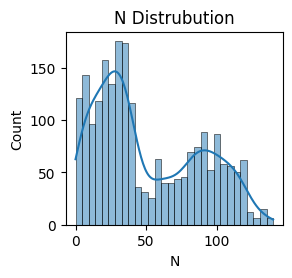

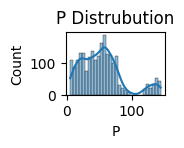

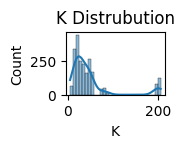

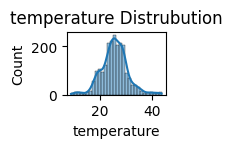

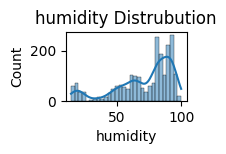

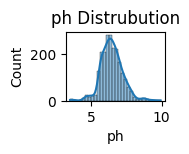

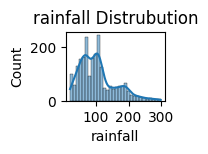

In [ ]:
crop_plant_system.head()
print(crop_plant_system.info())
print(crop_plant_system.describe())
print(crop_plant_system.isnull().sum())
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
plt.figure(figsize=(10,10))
for i,col in enumerate(features):
  plt.subplot(4,4, i+1)
  sns.histplot(crop_plant_system[col], kde=True, bins=30)
  plt.title(f'{col} Distrubution')
  plt.tight_layout()
  plt.show()

Encode Categorical Data

In [ ]:
!pip install sklearn
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
crop_plant_system['label'] = encode.fit_transform(crop_plant_system['label'])

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
print(crop_plant_system.head())

    N   P   K  temperature   humidity        ph    rainfall  label
0  90  42  43    20.879744  82.002744  6.502985  202.935536     20
1  85  58  41    21.770462  80.319644  7.038096  226.655537     20
2  60  55  44    23.004459  82.320763  7.840207  263.964248     20
3  74  35  40    26.491096  80.158363  6.980401  242.864034     20
4  78  42  42    20.130175  81.604873  7.628473  262.717340     20


Split data into feature and target


In [ ]:
feature = crop_plant_system[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = crop_plant_system['label']

Split data into train and test


In [ ]:
feature_train, feature_test, target_train, target_test = train_test_split(
    feature, target, test_size=0.2, random_state=42
)

In [ ]:
print(crop_plant_system.shape)

(2200, 8)


In [ ]:
print(feature_test.shape)
print(feature_train.shape)
print(target_train.shape)
print(target_test.shape)

(440, 7)
(1760, 7)
(1760,)
(440,)


Opps sorry, forgot one step, which is scaler


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
feature_train = scaler.fit_transform(feature_train)
feature_test = scaler.transform(feature_test)


In [ ]:
print(feature_train)
print(feature_test)

[[-9.03426596e-01 -1.12616170e+00 -6.68506601e-01 ...  9.36586183e-01
   1.93473784e-01  5.14970176e-03]
 [-3.67051340e-01  7.70358846e-01 -5.70589522e-01 ... -1.00470485e-01
   8.63917548e-01 -6.05290566e-01]
 [-1.17161422e+00  5.89737842e-01 -4.53089028e-01 ... -3.82774991e-01
   1.05029771e+00 -1.04580687e+00]
 ...
 [-1.06433917e+00 -5.24091685e-01 -3.35588533e-01 ... -8.98381379e-01
  -6.34357580e-04 -4.37358211e-02]
 [-1.06433917e+00  2.12501638e+00  3.05234239e+00 ...  3.86340190e-01
  -1.48467347e-01 -5.69036842e-01]
 [-5.01145154e-01  7.40255346e-01 -5.11839275e-01 ... -4.18045489e-01
   6.86860180e-01 -8.96531475e-01]]
[[ 1.34934948 -1.0960582  -0.02225388 ...  1.05232434 -0.37619899
  -1.38984486]
 [ 1.26889319 -1.36698971  0.05607978 ...  0.67956909 -0.28013033
  -0.96895253]
 [ 0.22296144  0.25859933  0.01691295 ...  0.98974316  0.60209743
   0.22056087]
 ...
 [ 1.88572474 -0.19295318 -0.62933977 ...  0.35134079  1.61311363
  -0.54905776]
 [ 1.75163092 -0.04243567 -0.570589

Training mdoel

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(feature_train, target_train)

RandomForestClassifier(random_state=42)

Predict test and show accuracy, classification report and confusion_matric
the accuracy shows 0.99 in result,which is very close to 1 and mean our model is best

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
prediction = model.predict(feature_test)
cm = confusion_matrix(target_test, prediction)
print(f"BaseLine Accuracy:",accuracy_score(target_test, prediction))
print(classification_report(target_test, prediction))
print(confusion_matrix(target_test, prediction))

BaseLine Accuracy: 0.9931818181818182
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00

visualize! visualize! visualize!

<ipython-input-15-96e5b277ad9e>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


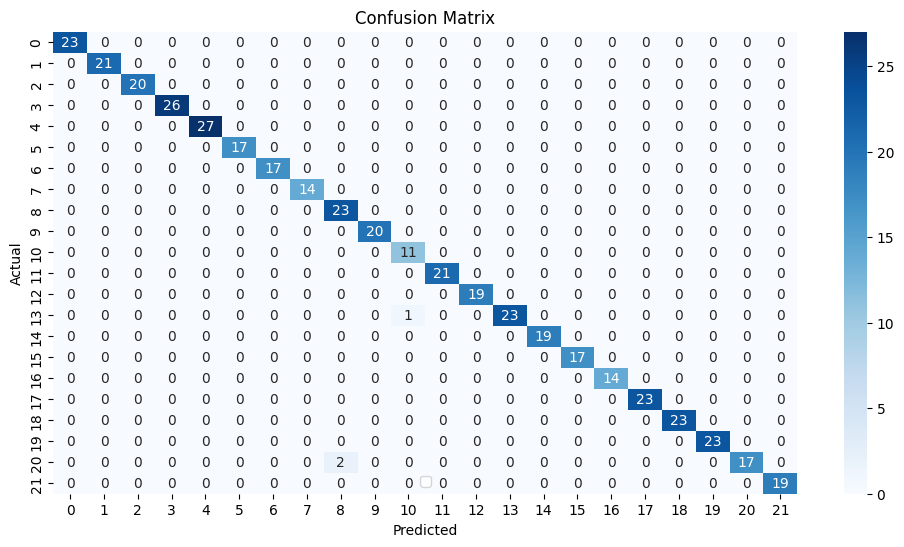

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend()
plt.title('Confusion Matrix')
plt.show()

Use gridSearch to find the best hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV
model1 = RandomForestClassifier()
parameter = {
    'n_estimators': [100,200,300,400], #number of tree in the forest
    'max_depth': [None, 10, 20, 30], #the maximum level of each tree, high value will cause modelf fail to generalization
    'max_features': [10, 20, 30, 40, 50], #this is one main thing that prevent overfitting
    'min_samples_split': [1,2,4] #the minimum number of each sample required to be at the leaf node of each tree
}
grid = GridSearchCV(model, parameter, cv=3, scoring='accuracy', verbose=3)
model_grad = grid.fit(feature_train, target_train)
print('Best Hyperparameter is:', model_grad.best_params_)
print('Best Score is:', model_grad.best_score_)
print('Best model is:', model_grad.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END max_depth=None, max_features=10, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=10, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=10, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=10, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=10, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=10, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=10, min_samples_split=1, n_estimators=300;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=10, min_samples_split=1, n_estimators=300;, score=nan total time=   0.0s
[CV 3/3] END max_

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Best Hyperparameter is: {'max_depth': None, 'max_features': 10, 'min_samples_split': 4, 'n_estimators': 100}
Best Score is: 0.9909113461363289
Best model is: RandomForestClassifier(max_features=10, min_samples_split=4, random_state=42)


train  xgboost model to compare which one is more accuracy

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(feature_train, target_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Shos best line and report and confusion matrix

In [ ]:
prediction_xgb = xgb.predict(feature_test)
cm = confusion_matrix(target_test, prediction_xgb)
print(f"Best line is:",accuracy_score(target_test, prediction_xgb))
print(classification_report(target_test, prediction_xgb))
print(confusion_matrix(target_test, prediction_xgb))

Best line is: 0.9863636363636363
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.96      0.96      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00     

Visualize visulize visualize

<ipython-input-19-39e9d9fa0946>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Confusion Matrix')

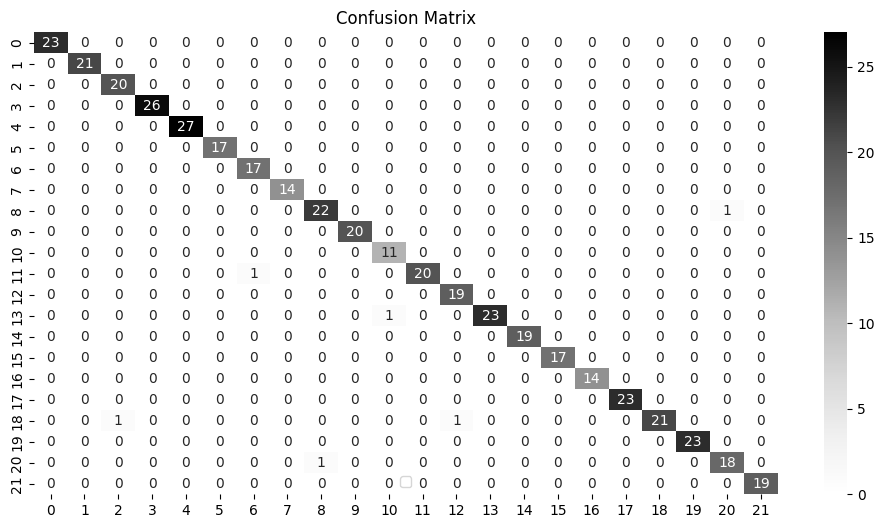

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys')
xlabel = "Predicted"
ylabel = "Actual"
plt.legend()
plt.title("Confusion Matrix")

use gridsearchcv to know best model, score etc..

In [ ]:
model2 = XGBClassifier()
parameter = {
    'n_estimators':[100,200,300,400],
    'max_depth':[None, 20, 30, 40],
    'learning_rate':[0.01, 0.1, 0.2, 0.3]
}
grid = GridSearchCV(model2, parameter, cv=3, scoring='accuracy', verbose=3)
grod = grid.fit(feature_train, target_train)
print("Best model:", grid.best_estimator_)
print("Best score:", grid.best_score_)
print("Best parameter:", grid.best_params_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3] END learning_rate=0.01, max_depth=None, n_estimators=100;, score=0.974 total time=   3.9s
[CV 2/3] END learning_rate=0.01, max_depth=None, n_estimators=100;, score=0.969 total time=   9.8s
[CV 3/3] END learning_rate=0.01, max_depth=None, n_estimators=100;, score=0.991 total time=   0.8s
[CV 1/3] END learning_rate=0.01, max_depth=None, n_estimators=200;, score=0.974 total time=   1.5s
[CV 2/3] END learning_rate=0.01, max_depth=None, n_estimators=200;, score=0.978 total time=   1.5s
[CV 3/3] END learning_rate=0.01, max_depth=None, n_estimators=200;, score=0.993 total time=   1.5s
[CV 1/3] END learning_rate=0.01, max_depth=None, n_estimators=300;, score=0.976 total time=   3.2s
[CV 2/3] END learning_rate=0.01, max_depth=None, n_estimators=300;, score=0.978 total time=   3.0s
[CV 3/3] END learning_rate=0.01, max_depth=None, n_estimators=300;, score=0.991 total time=   2.2s
[CV 1/3] END learning_rate=0.01, max_depth=None

Compare two model

In [ ]:
from sklearn.metrics import accuracy_score, recall_score,  f1_score, precision_score
model1_metrics = {
    'Accuracy': accuracy_score(target_test, prediction),
    'Recall': recall_score(target_test, prediction, average='macro'),
    'F1 score': f1_score(target_test, prediction, average='macro'),
    'Precision': precision_score(target_test, prediction, average='macro')
}
model2_metrics = {
    'Accuracy': accuracy_score(target_test, prediction_xgb),
    'Recall': recall_score(target_test, prediction_xgb, average='macro'),
    'F1 score': f1_score(target_test, prediction_xgb, average='macro'),
    'Precision': precision_score(target_test, prediction_xgb, average='macro')
}
model1_metrics

{'Accuracy': 0.9931818181818182,
 'Recall': 0.9933213716108454,
 'F1 score': 0.9926374055074331,
 'Precision': 0.9925757575757576}

In [ ]:
model2_metrics

{'Accuracy': 0.9863636363636363,
 'Recall': 0.9876203601890101,
 'F1 score': 0.9859403552771336,
 'Precision': 0.9848810101670513}

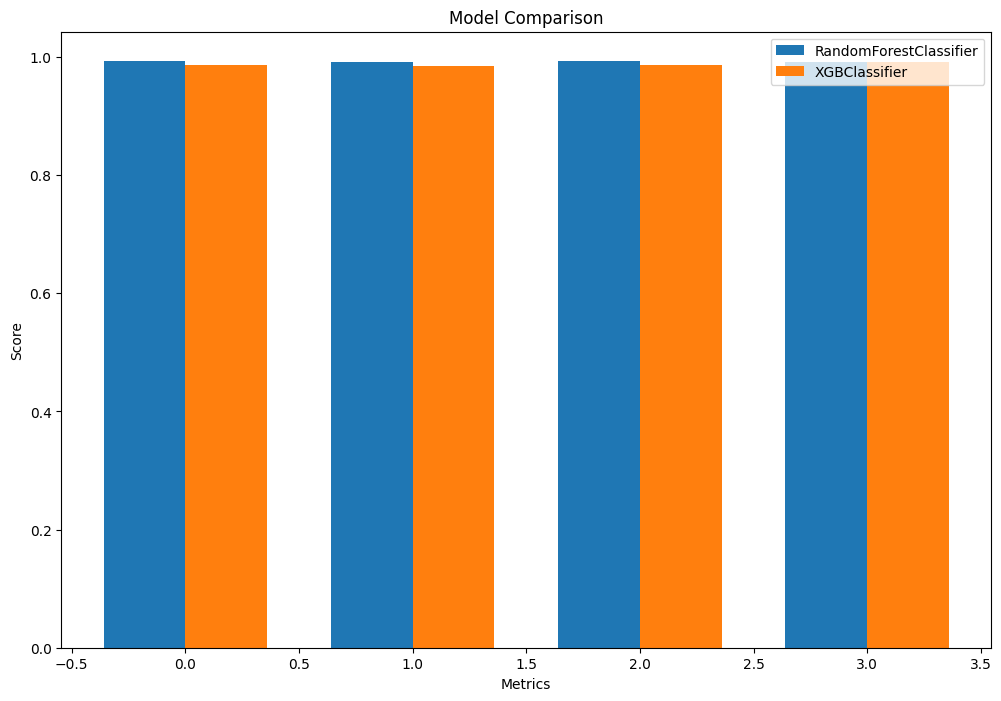

In [ ]:
model1_metrics = {
    'accuracy': 0.993,
    'precision': 0.992,
    'recall': 0.993,
    'F1 score': 0.992
}
model2_metrics = {
    'accuracy': 0.986,
    'precision': 0.984,
    'recall': 0.987,
    'F1 score': 0.992
}


labels = list(model1_metrics.keys())
model1_metrics = list(model1_metrics.values())
model2_metrics = list(model2_metrics.values())

x = np.arange(len(labels))
width = 0.36
plt.figure(figsize=(12,8))
plt.bar(x - width/2, model1_metrics, width, label='RandomForestClassifier')
plt.bar(x + width/2, model2_metrics, width, label='XGBClassifier')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend()
plt.title('Model Comparison')
plt.show()